# the Chennai Water Supply Manager

# STEP 0: Prepare
1. Import libraries
2. Download data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



pristine=pd.read_csv('D:\Semester 4\Soft Computing\Chennai Water Supply Manager\\reverse_df.xlsx - Chembarambaakam.csv',parse_dates={'date' : ['Date']},na_values=-1)


pristine=pristine.dropna()


pristine.reset_index(drop=True, inplace=True)
pristine['date']=pd.to_datetime(pristine['date'], format='%d/%m/%y').dt.strftime('%d/%m/%y')


originals=pristine
pristine.head(10)


,date,nth day in year,Storage (mcft),Inflow (cusecs),Rainfall (mm),Outflow (cusecs)
0,01/01/04,0,0.0,0.0,0.0,0.0
1,01/02/04,1,0.0,0.0,0.0,0.0
2,01/03/04,2,0.0,0.0,0.0,0.0
3,01/04/04,3,0.0,0.0,0.0,0.0
4,01/05/04,4,0.0,0.0,0.0,0.0
5,01/06/04,5,0.0,0.0,0.0,0.0
6,01/07/04,6,0.0,0.0,0.0,0.0
7,01/08/04,7,0.0,0.0,0.0,0.0
8,01/09/04,8,0.0,0.0,0.0,0.0
9,01/10/04,9,0.0,0.0,0.0,0.0


In [2]:
pristine.isnull().sum()


date                0
nth day in year     0
Storage (mcft)      0
Inflow (cusecs)     0
Rainfall (mm)       0
Outflow (cusecs)    0
dtype: int64

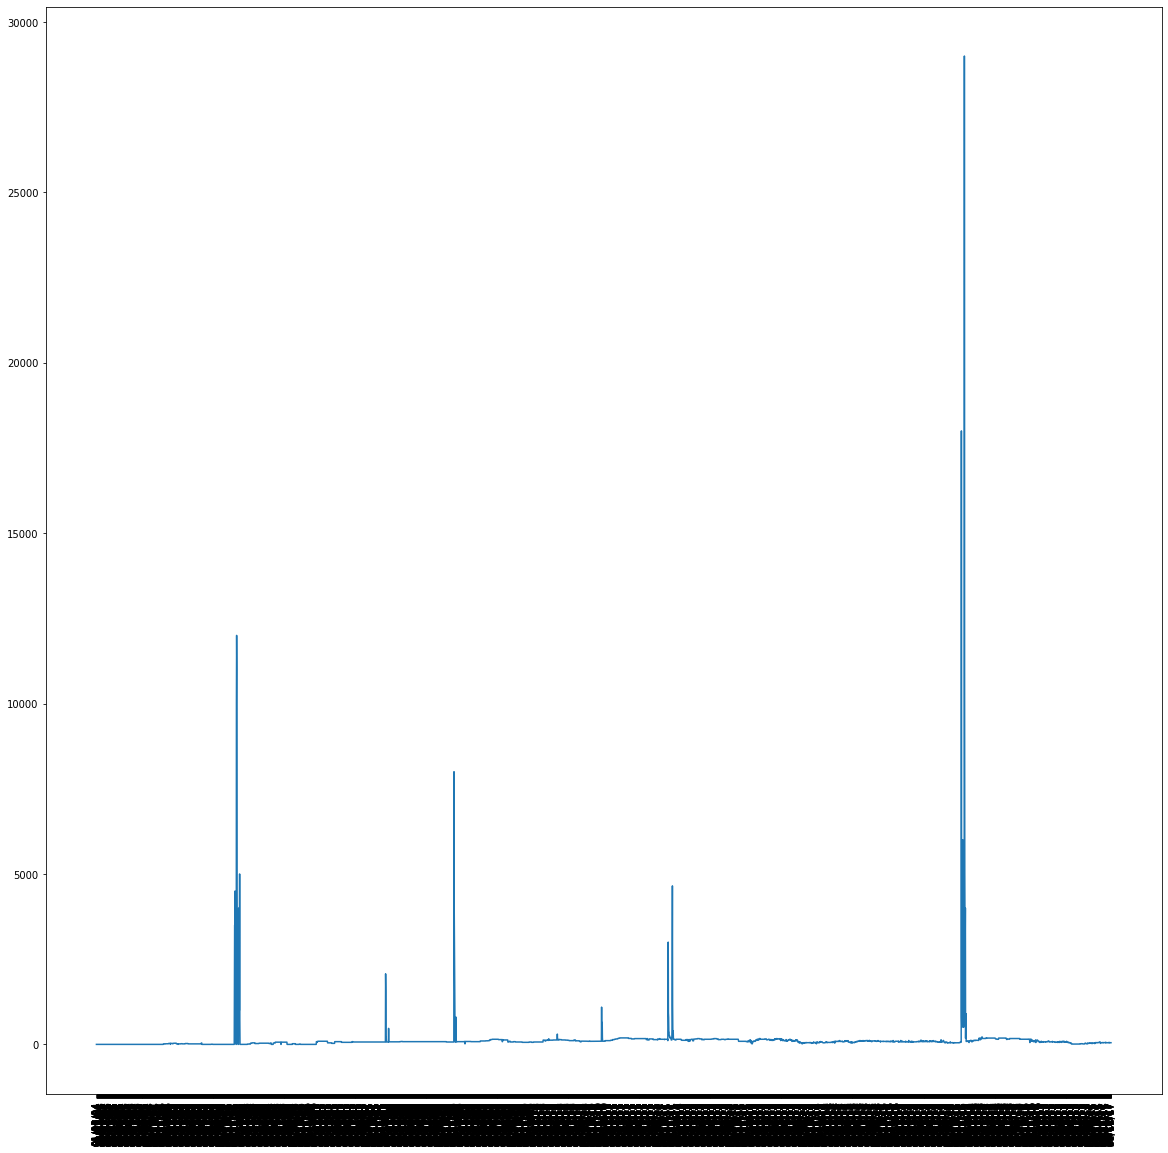

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=(20,20))
plt.plot(df['date'],df['Outflow (cusecs)'])
plt.xticks(rotation=90)
plt.show()
plt.savefig('D:\\fig.jpeg')

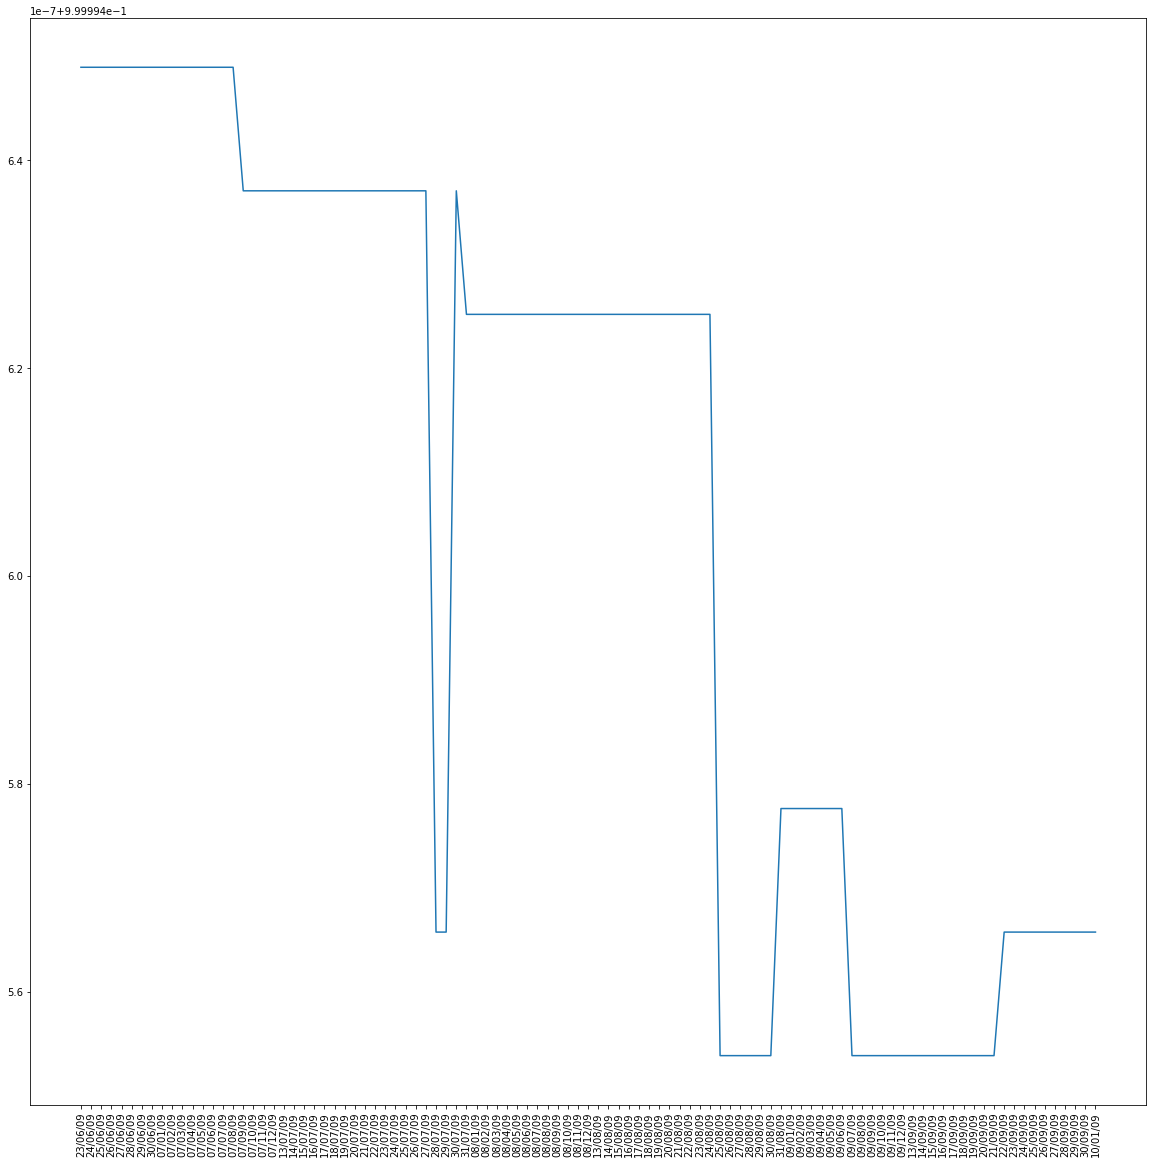

<Figure size 432x288 with 0 Axes>

In [44]:
'''

for i in range(1990,2300):
    minn=min(df['Outflow (cusecs)'])
    maxx=max(df['Outflow (cusecs)'])
    v=1-(df['Outflow (cusecs)'][i]-minn)/(maxx-minn)
    df['Outflow (cusecs)'][i]=v'''


plt.figure(figsize=(20,20))
#plt.ylim(0.9999855,0.9999860)
plt.plot(df.loc[2000:2100,'date'],df.loc[2000:2100,'Outflow (cusecs)'])#-min(df['Outflow (cusecs)']))/(max(df['Outflow (cusecs)'])-min(df['Outflow (cusecs)'])))

plt.xticks(rotation=90)
plt.show()

plt.savefig('D:\\fig2.jpeg')

# STEP 1: PREPROCESSING

1. remove duplicates
2. drop unnecessary columns
3. normalise data(v0: MinMax)
4. prepare sequence dataset
5. train-test split

In [30]:
raw=pristine
raw=raw.drop(columns=['date','nth day in year'])
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5088 entries, 0 to 5087
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Storage (mcft)    5088 non-null   float64
 1   Inflow (cusecs)   5088 non-null   float64
 2   Rainfall (mm)     5088 non-null   float64
 3   Outflow (cusecs)  5088 non-null   float64
dtypes: float64(4)
memory usage: 159.1 KB


In [33]:
cols=['Storage (mcft)', 'Inflow (cusecs)', 'Rainfall (mm)',
       'Outflow (cusecs)']
for i in cols:
    maxx=max(raw[i])
    minn=min(raw[i])
    raw[i]-=minn
    raw[i]/=(maxx-minn)
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5088 entries, 0 to 5087
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Storage (mcft)    5088 non-null   float64
 1   Inflow (cusecs)   5088 non-null   float64
 2   Rainfall (mm)     5088 non-null   float64
 3   Outflow (cusecs)  5088 non-null   float64
dtypes: float64(4)
memory usage: 159.1 KB


In [37]:
raw.describe()

,Storage (mcft),Inflow (cusecs),Rainfall (mm),Outflow (cusecs)
count,5088.000000,5088.000000,5088.000000,5088.000000
mean,0.411380,0.005213,0.008791,42.918022
std,0.281939,0.025290,0.035713,220.593261
min,0.000000,0.000000,0.000000,0.000000
25%,0.171231,0.000000,0.000000,16.551724
50%,0.386190,0.000000,0.000000,27.586207
75%,0.648999,0.003933,0.000000,42.758621
max,1.000000,1.000000,1.000000,10000.000000


In [38]:
raw.shape

(5088, 4)

In [36]:
raw['Outflow (cusecs)']*=10000

In [48]:
sequence.shape

(5083, 5, 4)

In [53]:
#FEATURE EXTRACTION: Prepare sequence



'''
 day n outflow
    
    
    
 5 days dependant   '''
lookback=5
sequence=np.zeros(((len(raw)-lookback),lookback,raw.shape[-1]))
target=np.zeros(len(raw)-lookback)

for i in range(lookback, len(raw)):
    for j in range(0,lookback):
        sequence[i-lookback][j]=raw.loc[i+j-lookback,:]
    target[i-lookback]=raw['Outflow (cusecs)'][i]
sequence[0]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [54]:
sequence[2000]

array([[4.78209658e-01, 0.00000000e+00, 0.00000000e+00, 5.17241379e+01],
       [4.72614841e-01, 0.00000000e+00, 0.00000000e+00, 5.17241379e+01],
       [4.67020024e-01, 0.00000000e+00, 0.00000000e+00, 5.17241379e+01],
       [4.61425206e-01, 0.00000000e+00, 4.21052632e-03, 5.17241379e+01],
       [4.56713781e-01, 0.00000000e+00, 0.00000000e+00, 5.17241379e+01]])

In [55]:
raw.loc[2000:2004,:]

,Storage (mcft),Inflow (cusecs),Rainfall (mm),Outflow (cusecs)
2000,0.478210,0.0,0.000000,51.724138
2001,0.472615,0.0,0.000000,51.724138
2002,0.467020,0.0,0.000000,51.724138
2003,0.461425,0.0,0.004211,51.724138
2004,0.456714,0.0,0.000000,51.724138


In [56]:
pristine.loc[2000:2004,:]

,date,nth day in year,Storage (mcft),Inflow (cusecs),Rainfall (mm),Outflow (cusecs)
2000,23/06/09,173,1624.0,0.0,0.0,150.0
2001,24/06/09,174,1605.0,0.0,0.0,150.0
2002,25/06/09,175,1586.0,0.0,0.0,150.0
2003,26/06/09,176,1567.0,0.0,2.0,150.0
2004,27/06/09,177,1551.0,0.0,0.0,150.0


In [60]:
def train_test_split(sequence,target,boundary=0.2):
    x_train=sequence[:int(len(sequence)*0.8)]
    x_test=sequence[int(len(sequence)*0.8):]
    y_train=target[:int(len(target)*0.8)]
    y_test=target[int(len(target)*0.8):]
    return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test=train_test_split(sequence,target)
print(x_train.shape,
    x_test.shape,
    y_train.shape,
    y_test.shape)

(4066, 5, 4) (1017, 5, 4) (4066,) (1017,)


# STEP 2: Model building

v0: Classic LSTM 

## Mv0: Classic LSTM

*. LSTM-Dense model (32-1)

In [70]:
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import layers
model=models.Sequential()
model.add(layers.LSTM(100,
                        dropout=0.1,
                        recurrent_dropout=0.5,
                        return_sequences=True,
                        input_shape=(x_train.shape[1], x_train.shape[2])))

model.add(layers.LSTM(100, 
                        dropout=0.1,
                        recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.compile(loss='mae', optimizer=optimizers.RMSprop())

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 100)            42000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 122,501
Trainable params: 122,501
Non-trainable params: 0
_________________________________________________________________


In [71]:
history = model.fit(x_train, y_train, 
                    epochs=100, 
                    batch_size=70, 
                    validation_data=(x_test, y_test))

Train on 4066 samples, validate on 1017 samples
Epoch 1/100
4066/4066 [==============================] - 11s 3ms/sample - loss: 26.4907 - val_loss: 49.9953
Epoch 2/100
4066/4066 [==============================] - 2s 421us/sample - loss: 20.7085 - val_loss: 46.6649
Epoch 3/100
4066/4066 [==============================] - 2s 421us/sample - loss: 18.0734 - val_loss: 46.2406
Epoch 4/100
4066/4066 [==============================] - 2s 413us/sample - loss: 16.4450 - val_loss: 43.4675
Epoch 5/100
4066/4066 [==============================] - 2s 419us/sample - loss: 15.2603 - val_loss: 42.5621
Epoch 6/100
4066/4066 [==============================] - 2s 419us/sample - loss: 14.2940 - val_loss: 41.5002
Epoch 7/100
4066/4066 [==============================] - 2s 415us/sample - loss: 13.5354 - val_loss: 39.4969
Epoch 8/100
4066/4066 [==============================] - 2s 419us/sample - loss: 12.9256 - val_loss: 39.1039
Epoch 9/100
4066/4066 [==============================] - 2s 417us/sample - loss: 

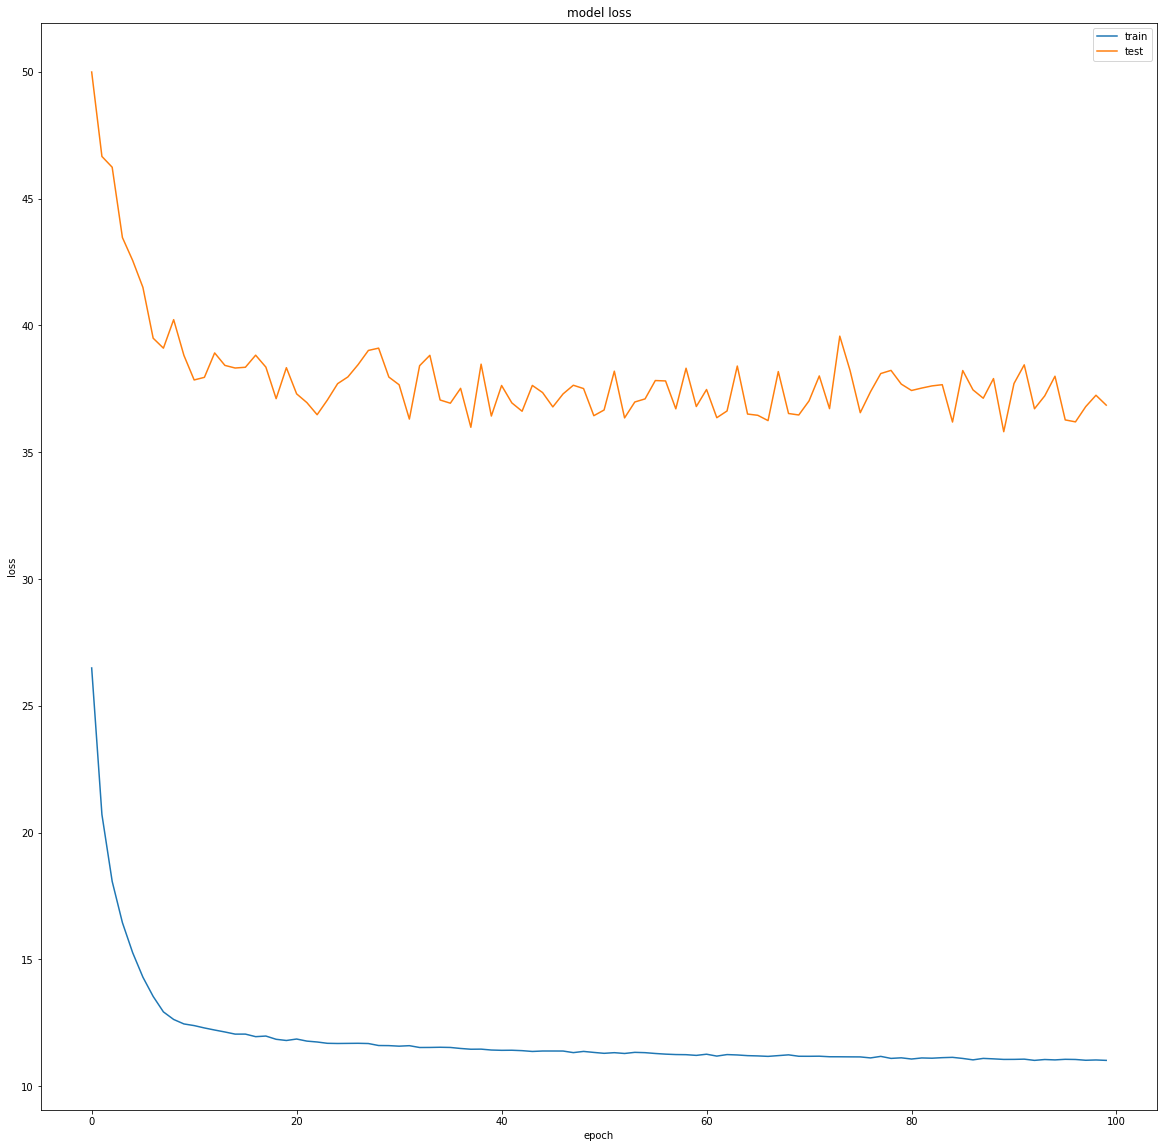

In [72]:
plt.figure(figsize=(20,20))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [133]:
pristine.tail()

,date,nth day in year,Storage (mcft),Inflow (cusecs),Rainfall (mm),Outflow (cusecs)
5083,27/12/17,360,1863.0,0.0,0.0,49.0
5084,28/12/17,361,1859.0,0.0,0.0,49.0
5085,29/12/17,362,1855.0,0.0,0.0,49.0
5086,30/12/17,363,1851.0,0.0,0.0,49.0
5087,31/12/17,364,1847.0,0.0,0.0,49.0


In [134]:
start=4300+365++60+365//2
end=4000+365+365+60+365//2
output=model.predict(sequence[start:end])
output/=10000
output*=(maxx-minn)
output+=minn
output.shape


(65, 1)

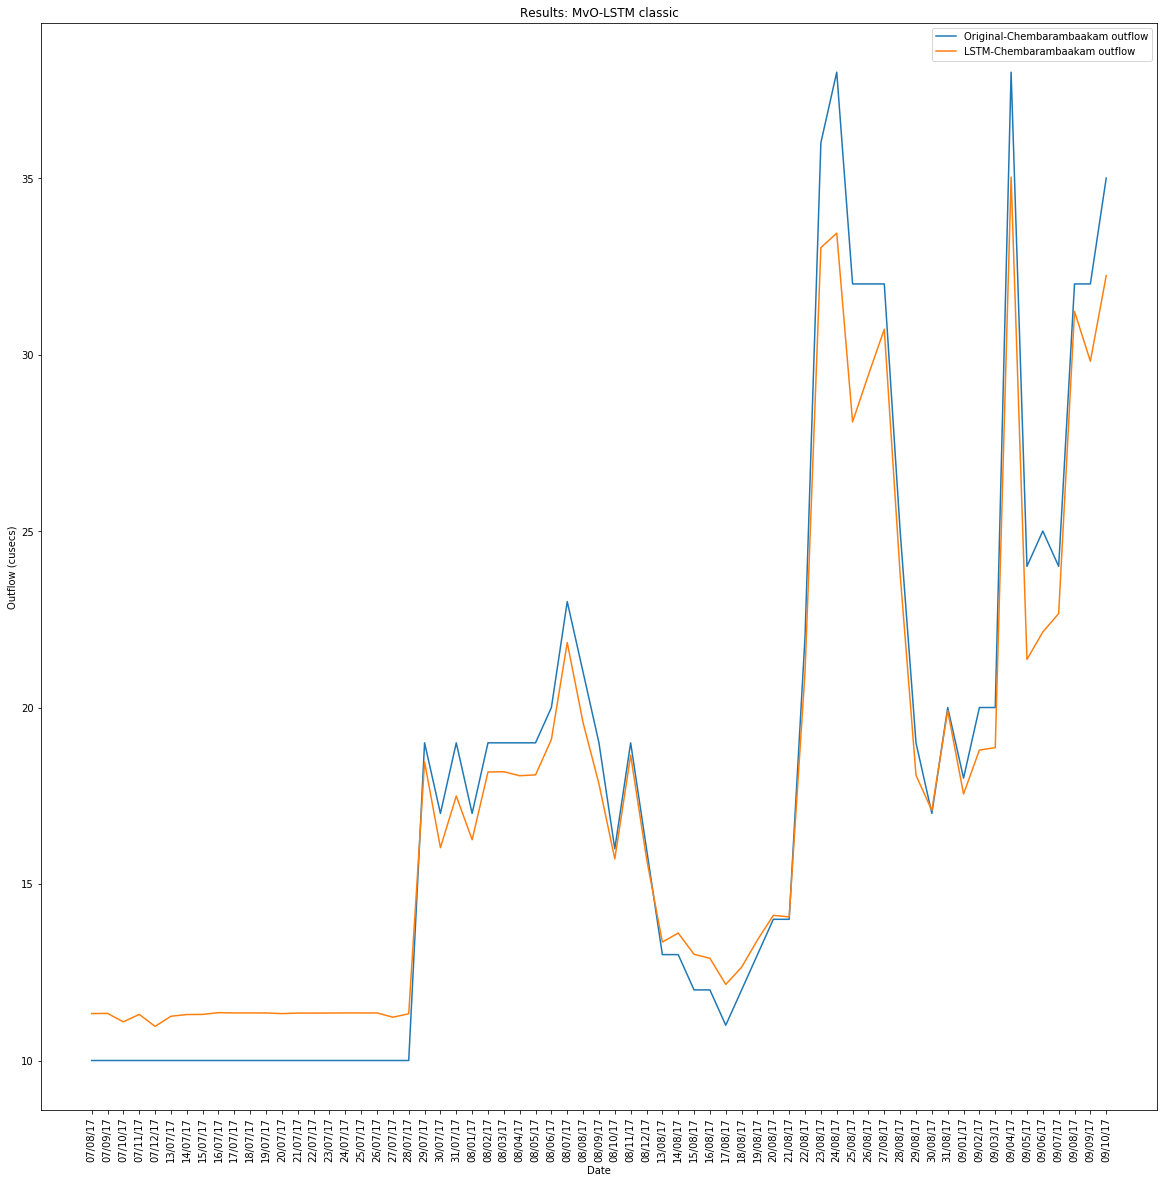

In [135]:
plt.figure(figsize=(20,20))
plt.plot(pristine.loc[start+4:end+3,'date'].values,pristine.loc[start+4:end+3,['Outflow (cusecs)']].values,label='Original-Chembarambaakam outflow')
plt.plot(pristine.loc[start+4:end+3,'date'].values,output,label='LSTM-Chembarambaakam outflow')
plt.xticks(rotation=90)
plt.legend()
plt.title('Results: MvO-LSTM classic')
plt.ylabel('Outflow (cusecs)')
plt.xlabel('Date')
#plt.legend('Original-Chembarambaakam outflow','LSTM-Chembarambaakam outflow')
plt.savefig('D:\\Semester 4\\Soft Computing\\Chennai Water Supply Manager\\v0.jpeg')
plt.show()

In [85]:
pristine.loc[5:,['Outflow (cusecs)']].values

array([[ 0.],
       [ 0.],
       [ 0.],
       ...,
       [49.],
       [49.],
       [49.]])

In [137]:
model.save('D:\\Semester 4\\Soft Computing\\Chennai Water Supply Manager\\v0.h5')

In [120]:
pristine.loc[start+4:end+3,'date'].values

array(['24/06/16', '25/06/16', '26/06/16', '27/06/16', '28/06/16',
       '29/06/16', '30/06/16', '07/01/16', '07/02/16', '07/03/16',
       '07/04/16', '07/05/16', '07/06/16', '07/07/16', '07/08/16',
       '07/09/16', '07/10/16', '07/11/16', '07/12/16', '13/07/16',
       '14/07/16', '15/07/16', '16/07/16', '17/07/16', '18/07/16',
       '19/07/16', '20/07/16', '21/07/16', '22/07/16', '23/07/16',
       '24/07/16', '25/07/16', '26/07/16', '27/07/16', '28/07/16',
       '29/07/16', '30/07/16', '31/07/16', '08/01/16', '08/02/16',
       '08/03/16', '08/04/16', '08/05/16', '08/06/16', '08/07/16',
       '08/08/16', '08/09/16', '08/10/16', '08/11/16', '08/12/16',
       '13/08/16', '14/08/16', '15/08/16', '16/08/16', '17/08/16',
       '18/08/16', '19/08/16', '20/08/16', '21/08/16', '22/08/16',
       '23/08/16', '24/08/16', '25/08/16', '26/08/16', '27/08/16',
       '28/08/16', '29/08/16', '30/08/16', '31/08/16', '09/01/16',
       '09/02/16', '09/03/16', '09/04/16', '09/05/16', '09/06/